In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# read data to dataframe
#df_2011 = pd.read_csv('./2011 Stack Overflow Survey Results.csv', encoding = "utf-8")
df_2021 = pd.read_csv('./survey_results_public.csv', encoding = "utf-8")
df_2021_schema = pd.read_csv('./survey_results_schema.csv', encoding = "utf-8")


In [3]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [4]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

df = pd.DataFrame(data=df_2021.columns, columns=['col21'])

col_dict = {'col21':[], 'q21':[], 'q11':[]}
for col in df_2021.columns:
    col_dict['col21'].append(col)
    qname = col.replace('HaveWorkedWith','').replace('WantToWorkWith','')
    try:
        question = df_2021_schema['question'][df_2021_schema['qname'] == qname].iloc[0]
        if question in df_2011.columns:
            q11 = question
        else:
            q11 = ''
    except:
        question = ''
        q11 = ''
    col_dict['q21'].append(question)
    col_dict['q11'].append(q11)
df = pd.DataFrame(data=col_dict)

df

In [5]:
df_2021['LanguageHaveWorkedWith'].value_counts()

Python                                                                                                 1337
HTML/CSS;JavaScript;Node.js;TypeScript                                                                  811
Java                                                                                                    715
HTML/CSS;JavaScript;PHP;SQL                                                                             674
C#                                                                                                      597
                                                                                                       ... 
Assembly;Bash/Shell;C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Perl;PHP;Python;SQL;VBA       1
C#;C++;Dart;Go;JavaScript;Node.js;SQL;TypeScript                                                          1
Bash/Shell;C;C++;Groovy;HTML/CSS;Java;JavaScript;Node.js;SQL;TypeScript                                   1
Bash/Shell;C;HTML/CSS;JavaSc

            count
value            
COBOL    0.005237
Crystal  0.005585
APL      0.006424
Erlang   0.007802
F#       0.009636


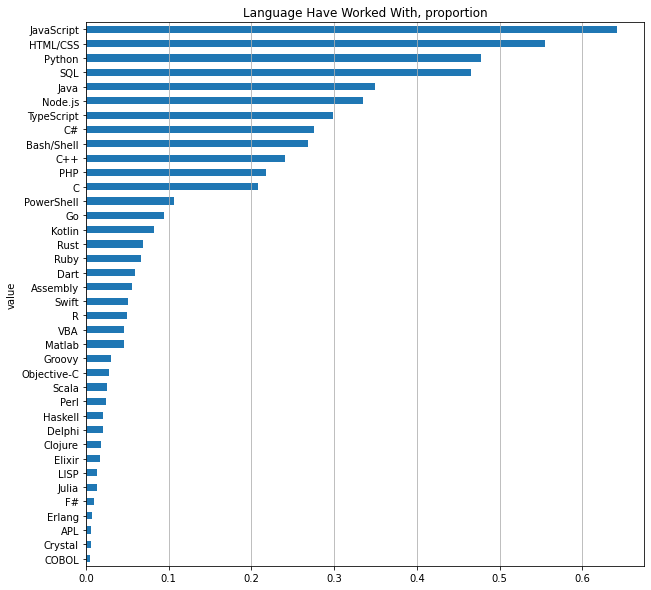

,value,count
11,JavaScript,53587
13,HTML/CSS,46259
35,Python,39792
10,SQL,38835
26,Java,29162
24,Node.js,27975
25,TypeScript,24909
37,C#,22984
2,Bash/Shell,22385
33,C++,20057


In [29]:
from collections import defaultdict

def get_possible_vals(col):
    return(set([val.strip() for sublist in col.dropna().str.split(";").tolist() for val in sublist]))

def get_total_counts(df, col):
    df_val_counts = df[col].value_counts().reset_index()
    df_val_counts = df_val_counts.rename(columns={'index': 'value', col: 'count'})
    possible_vals = get_possible_vals(df[col])

    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for idx in range(df_val_counts.shape[0]):
            row_vals = df_val_counts['value'][idx].split(";")
            if val in row_vals:
                new_df[val] += int(df_val_counts['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['value', 'count']
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, col, title='', plot=True):
    '''
    INPUT 
        df - DataFrame, data
        col - string, holding the column name
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        df_counts - DataFrame, value counts
        Displays a plot values for the column.
    '''
    df_coounts = get_total_counts(df, col)

    df_prop = df_coounts.sort_values('count', ascending=True).set_index('value')
    if plot:
        #(df_coounts/df_coounts.sum()).plot(kind='bar', legend=None);
        df_prop = df_prop/df[col].shape[0]
        print(df_prop.head())
        df_prop.plot(kind='barh',figsize=(10,10), legend=None).grid(axis='x');
        plt.title(title);
        plt.show()
    return df_coounts

df_lang_worked = clean_and_plot(df_2021, 'LanguageHaveWorkedWith', 'Language Have Worked With, proportion')
df_lang_worked

              count
value              
Couchbase  0.013255
IBM DB2    0.017234
Cassandra  0.022448
DynamoDB   0.061566
Oracle     0.106281


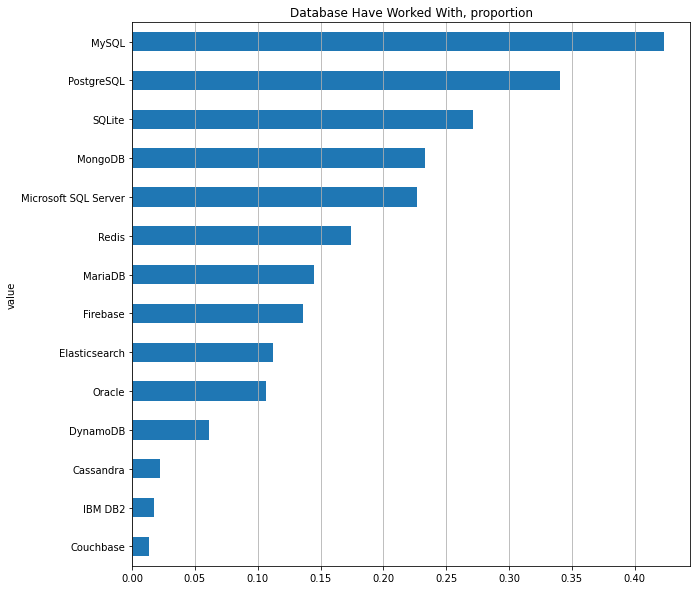

,value,count
0,MySQL,35289
12,PostgreSQL,28424
2,SQLite,22634
11,MongoDB,19479
3,Microsoft SQL Server,18896
9,Redis,14552
13,MariaDB,12088
8,Firebase,11373
5,Elasticsearch,9331
10,Oracle,8868


In [30]:
df_db_worked = clean_and_plot(df_2021, 'DatabaseHaveWorkedWith', 'Database Have Worked With, proportion')
df_db_worked